# NOMAD Data Reduction Tutorials, by Dan and Kate

If you have questions about these tutorials, you may contact me at: oldsdp@ornl.gov

If you have complaints or especially difficult questions, you may contact me at: pagekl@ornl.gov

In [1]:
#this is just stuff to setup the enviornment and make the plots pretty.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from some_danfinitions import *


import warnings
warnings.filterwarnings('ignore')

%matplotlib notebook

num_colors = (6)
cm = plt.cm.get_cmap(name='inferno')
cc = [cm(1.*i/num_colors) for i in range(num_colors)]
mpl.rcParams['axes.color_cycle'] = cc


plt.rcParams.update({'font.size': 16})
plt.rcParams.update({'font.family': 'Helvetica'})



### Demo 1: Reducing raw bank-by-bank NOMAD data is converted into I(d) data for Reitveld refinements

To generated reduced, normalized reciprocal space data from NOMAD (like the kind used in Reitveld refinements), we must remove the background scattered intensity due to the sample container (the MTcan) and any incident background scatter present in the empty instrument (the MTinst). 

Additionally, we must normalize the data to account for the different relative intensities and detector efficiencies across each individual bank.  To do this, we divide the measured data by a constant, incoherent scatterer (Vandadium).  

For this demo, you will read in a getN file (getN files are similar to GSAS files, but have not been normalized) and examine how the same scattered intensity patteren, I(d), is presented differently in each of the 6 banks on NOMAD.  

You will then generate some simple 'hand crafted' reduced NOMAD data.

Questions to consider:


1.  Why do the peaks appear to have different shapes in different banks?

2.  Which bank on NOMAD appears to be the highest resolution bank?

3.  Which detector bank sees the fewest neutrons?

4.  How does the peak shape vary between banks?


In [2]:
#The read_getN_file routine automatically loads data from a getN file, and converts it into d-spacing for you. 

d, i_Vrod = read_getN_file('getN_files/NOM_vanadium.getN')

d, i_MTcan = read_getN_file('getN_files/NOM_MTvanCan1.getN')
d, i_MTinst = read_getN_file('getN_files/NOM_MT_instrument.getN')

d, i_BaTiO3 = read_getN_file('getN_files/NOM_BaTiO3.getN')
d, i_Si = read_getN_file('getN_files/NOM_NIST_Si.getN')

The six different banks of detectors on NOMAD can be accessed individually through their index, which is related to the center two-theta angle by:

[0] = 15$^\circ$ bank

[1] = 31$^\circ$ bank

[2] = 65$^\circ$ bank

[3] = 120$^\circ$ bank

[4] = 150$^\circ$ bank

[5] = 9$^\circ$ bank

<IPython.core.display.Javascript object>


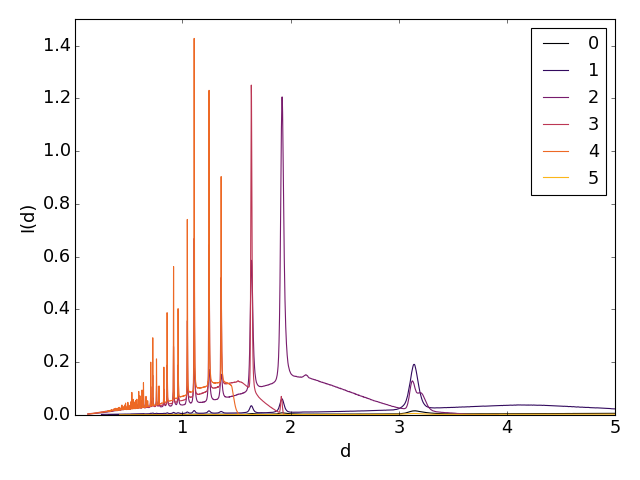

In [3]:
#Let's start by looking at the different banks, before any reduction has been performed.  

#Here is an example of how to plot data, comparing the raw data from all banks:
plt.figure()

#You can change the x-axis plotted from d[i] to np.pi*2/d[i] to see the data as a function I(Q) instead of I(d)
for i in range(6):
    plt.plot(d[i],i_Si[i],label=str(i))  

plt.axis([.01,5,0,1.5])
    
#You can uncomment the following line if you are having trouble finding bank [5]
#plt.gca().set_yscale('log')

plt.xlabel('d')
plt.ylabel('I(d)')
plt.legend(loc=0,fontsize=16)
plt.tight_layout()

Now that we've seen how different the banks of raw data can look, let's normalize things.

The simplified form of normaling the data we are going to use is:

## $I_{norm} = \frac{I_{sample} - I_{MTcan} - I_{MTinst}}{I_{Vrod}}$

<IPython.core.display.Javascript object>


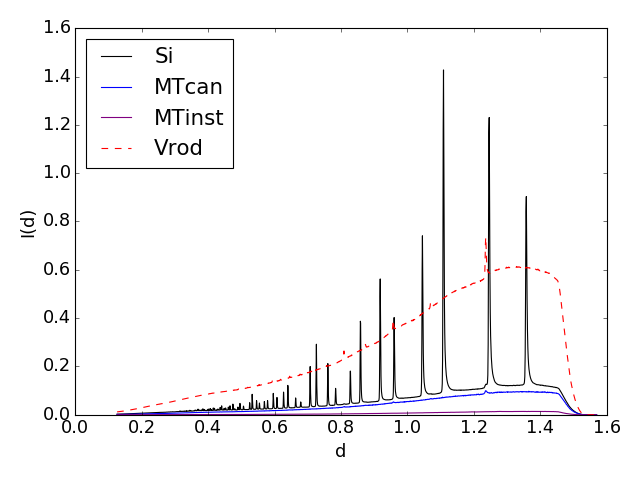

In [4]:
#To begin, we should plot all 4 relevant sets of data.  Let's switch to just looking at a single bank.

bank = 4

plt.figure()

plt.plot(d[bank], i_Si[bank],    label='Si',color='black')
plt.plot(d[bank], i_MTcan[bank],    label='MTcan',color='blue')
plt.plot(d[bank], i_MTinst[bank], label='MTinst', color='purple')
plt.plot(d[bank], i_Vrod[bank],    label='Vrod',color='red',linestyle='--')


plt.legend(loc=0)
plt.xlabel('d')
plt.ylabel('I(d)')
plt.tight_layout()


In [5]:
#Now, let's normalize the data.  The loop below will perform the process on all 6 banks for you.

In [6]:
norm_i_Si = np.zeros([len(d),len(d[0])]) #this is just creating a new array with the dimensions of our data

for bank in range(6):
    norm_i_Si[bank] = (i_Si[bank] - i_MTcan[bank] - i_MTinst[bank]) / (i_Vrod[bank])

If we plot the 6 banks atop each other, just as we did the raw data above, we'll clearly see the reasons for all this fuss.

<IPython.core.display.Javascript object>


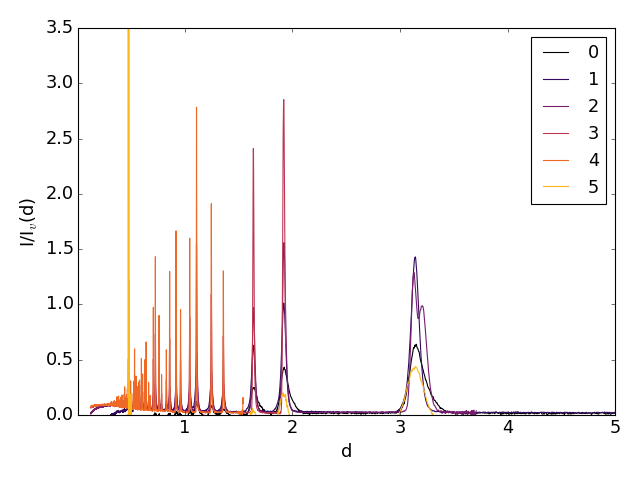

In [7]:
plt.figure()

#You can change the x-axis plotted from d[i] to np.pi*2/d[i] to see the data as a function I(Q) instead of I(d)
for i in range(6):
    plt.plot(d[i],norm_i_Si[i],label=str(i))  

plt.axis([.01,5,0,3.5])
    

plt.xlabel('d')
plt.ylabel('I/I$_v$(d)')
plt.legend(loc=0,fontsize=16)
plt.tight_layout()

Don't fret the very tail-end of the datasets odd behavior.  Statistics get poor, and we end up diving something small by something even smaller (approaching division by zero).  Normally, we cut those parts of the data out, and don't fit them.

From here, you can try reducing some of the more intersting samples in the getN folder.  You can copy and paste some of the cells from above down below, changing the sample name where appropriate.  The V-rod, MTinst, and MTcan files will still work for these examples.

In [8]:
d, i_BaTiO3 = read_getN_file('getN_files/NOM_BaTiO3.getN')
d, i_diamond = read_getN_file('getN_files/NOM_diamond.getN')
d, i_GaPO4 = read_getN_file('getN_files/NOM_GaPO4.getN')
d, i_SiO2_tetra = read_getN_file('getN_files/NOM_SiO2_crystobalite.getN')
d, i_SiO2_glass = read_getN_file('getN_files/NOM_SiO2_glass.getN')